In [1]:
import requests
import json
import cv2
import numpy as np
import os
import sys

In [2]:
sys.path.append('/home/ma-user/work/OCR/')

In [3]:
headers = {
'Host': 'api.coolapk.com',
'Accept': '*/*',
'X-Requested-With': 'XMLHttpRequest',
'X-App-Token': '6f3978292d6bf9fc196f6ad8ee3457212FD0D048-86C7-46C5-98D1-99F5FD4DF8970x626cd5df',
'Accept-Language': 'zh-Hans-CN;q=1.0, en-CN;q=0.9',
'X-Sdk-Locale': 'zh-CN',
'X-Api-Version': '11',
'X-App-Device': 'QMxASZu9GaQlGI7UGbwBXQgsTZsBHcBByOgsDI7AyO3kDOGRENEZUNGlTOtEDR4kTL1MkN00yNDZDOtgDNwQEMEZkM',
'X-App-Code': '2110201',
'User-Agent': 'Mozilla/5.0 (iPhone 11; CPU iPhone OS 14_8 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1 (#Build; Apple; iPhone 11; iOS14.8; 14.8) +iCoolMarket/4.4.4',
'X-Sdk-Int': '14.8',
'X-App-Version': '4.4.4',
'Accept-Encoding': 'br;q=1.0, gzip;q=0.9, deflate;q=0.8',
'Connection': 'keep-alive',
'Cookie': 'SESSID=8108d6984a7d3e0ab251f2a3e25bc6197c7b800b',
'X-App-Id': 'com.coolapk.app'
}
url = "https://api.coolapk.com/v6/user/feedList?page=1&uid=3262617"
response = requests.get(url, headers=headers).text
response = json.loads(response)

### 读取最近5条记录

In [4]:
img_list = []
for item in response['data'][0:5]:
    img_list.append(item['pic'])

In [5]:
img_list

['http://image.coolapk.com/feed/2022/0430/07/3262617_c32963a0_4603_853_208@1123x2001.jpeg',
 'http://image.coolapk.com/feed/2022/0429/07/3262617_d2889db3_8228_1348_740@1123x2001.jpeg',
 'http://image.coolapk.com/feed/2022/0428/07/3262617_f7e21e1f_1253_6479_644@1123x2001.jpeg',
 'http://image.coolapk.com/feed/2022/0427/07/3262617_399fa4fa_4207_6354_335@1123x2001.jpeg',
 'http://image.coolapk.com/feed/2022/0426/06/3262617_4b57dd32_7077_7643_808@1123x2001.jpeg']

In [13]:
def download_img(url_info):
    if url_info:
        print("-----------正在下载图片 %s -----------"%(url_info))
        # 这是一个图片的url
        try:
            url = url_info
            response = requests.get(url)
            # 获取的文本实际上是图片的二进制文本
            img = response.content
            # 将他拷贝到本地文件 w 写  b 二进制  wb代表写入二进制文本
            #保存路径
            path='%s.jpg' % ('curr_image')
            with open(path, 'wb') as f:
                f.write(img)
        except Exception as ex:
            print("--------出错继续----")
            pass

In [14]:
download_img(img_list[0])

-----------正在下载图片 http://image.coolapk.com/feed/2022/0430/07/3262617_c32963a0_4603_853_208@1123x2001.jpeg -----------


In [1]:
from PIL import  Image
import numpy as np
import cv2
from keys import alphabetChinese as alphabet

In [2]:
im_test = Image.open("curr_image.jpeg")

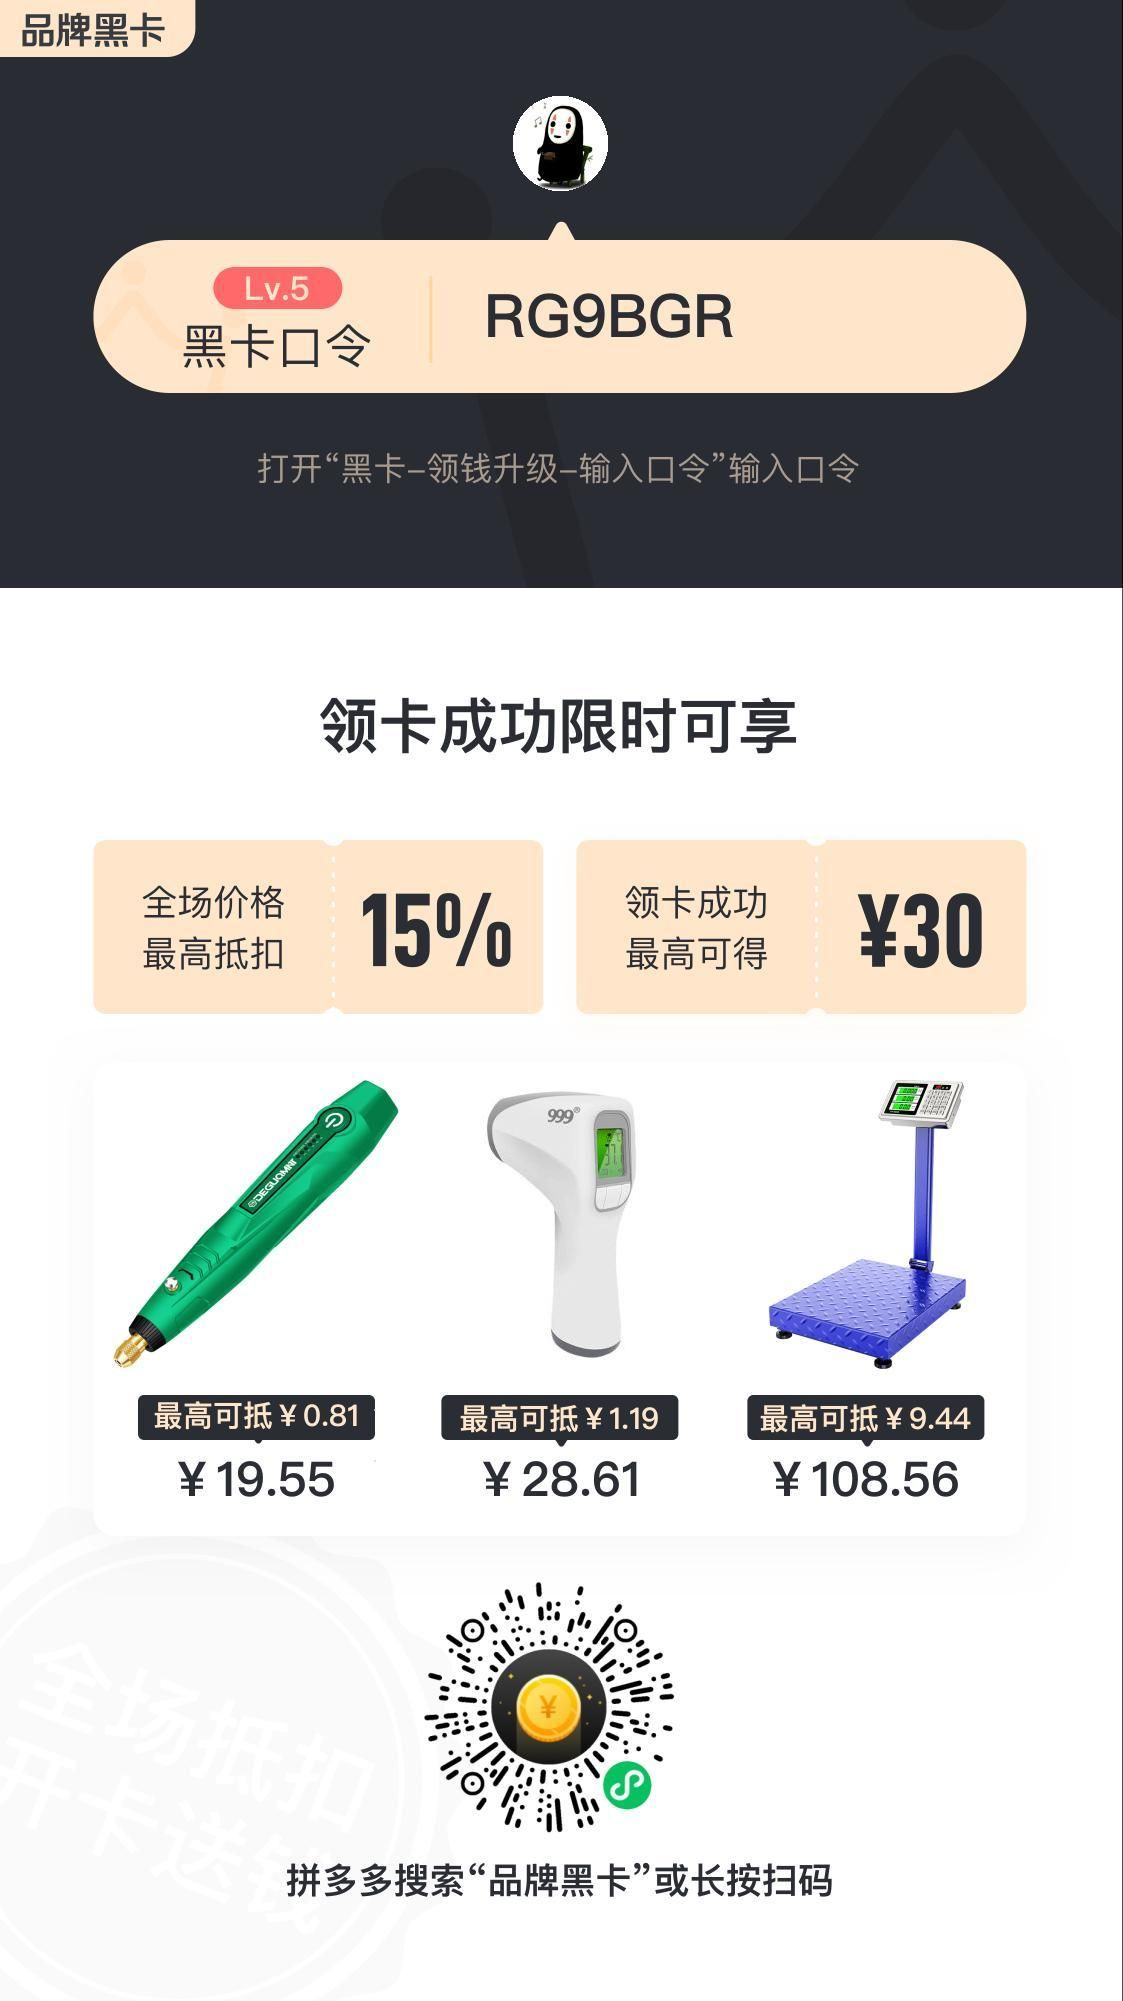

In [3]:
im_test

In [4]:
from model import OcrHandle

In [5]:
ocrHandle = OcrHandle("dbnet.onnx", "crnn_lite_lstm.onnx")

In [6]:
ocrHandle.text_predict(im_test,256)

[[array([[215, 264],
         [347, 264],
         [347, 308],
         [215, 308]], dtype=int16),
  'L5',
  0.7163898],
 [array([[461, 277],
         [737, 277],
         [737, 344],
         [461, 344]], dtype=int16),
  'RG9BGR',
  0.70750755],
 [array([[175, 317],
         [382, 317],
         [382, 371],
         [175, 371]], dtype=int16),
  '黑卡口令',
  0.68571335],
 [array([[250, 438],
         [855, 438],
         [855, 491],
         [250, 491]], dtype=int16),
  '打开"黑卡-领钱升级-输入口令"输入口令',
  0.7531583],
 [array([[307, 683],
         [790, 683],
         [790, 750],
         [307, 750]], dtype=int16),
  '领卡成功限时可享',
  0.5313095],
 [array([[136, 871],
         [294, 871],
         [294, 929],
         [136, 929]], dtype=int16),
  '全场价格',
  0.57734936],
 [array([[347, 875],
         [526, 875],
         [526, 978],
         [347, 978]], dtype=int16),
  '159',
  0.59824854],
 [array([[610, 871],
         [781, 871],
         [781, 925],
         [610, 925]], dtype=int16),
  '领卡成功',
  0.702

In [21]:
import datetime

In [28]:
datetime.date.today().strftime('%Y/%m%d')

'2022/0430'

### 使用黑卡

In [5]:
def fuck_pdd(invite_word):
    pdd_headers = {
        'Host': 'mobile.yangkeduo.com',
        'Accept': 'application/json, text/plain, */*',
        'Accept-Language': 'zh-cn',
        'Accept-Encoding': 'gzip, deflate, br',
        'AccessToken': 'XXXXXXXXXXXXXXXXXXXXXXXXX',
        'Content-Type': 'application/json;charset=UTF-8',
        'Origin': 'https://mobile.yangkeduo.com',
        'User-Agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 14_8 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 MicroMessenger/8.0.14(0x18000e2f) NetType/WIFI Language/zh_CN miniProgram',
        'Connection': 'keep-alive',
        'Referer': 'https://mobile.yangkeduo.com/blackcard_index.html?_pdd_fs=1&_x_query=%E9%BB%91%E5%8D%A1&xcx_trace_id=8677646960970661&refer_page_sn=10015&refer_page_name=search_result&xcx_version=v8.0.8.8',
        'Content-Length': '46',
        'Cookie': 'webp=1; pdd_vds=gaLLNIiEomIGQnLPPPoimPEtQOPoiyPPoyiPGymmyPILtNyimbQLtOaoonPo; PDDAccessToken=XXXXXXXXXXXXXXXXXXXXXXXXX; pdd_user_id=6946038757; pdd_user_uin=26C7L3MSW4YOGDRWTNMLX3Y5GQ_GEXDA; _nano_fp=XpEyXpXan0P8XqEoXT_mgnnjITmUoBxkw0IAQuNw; api_uid=Cko0lGJSlr4uuwBYPByFAg=='
    }
    pdd_data = {"scene_id":"black_card","invite_word":"{}".format(invite_word)}
    pdd_url = "https://mobile.yangkeduo.com/proxy/api/api/brand-chaumet/invite/word/command/use_benefits?pdduid=6946038757"
    response = requests.post(pdd_url, headers=pdd_headers, data=pdd_data).text
    print(response)

{"success":true,"error_code":1000000,"error_msg":null,"server_time":1651329587,"server_time_ms":1651329587162,"result":{"code":5001016,"amount":null,"experience_card_duration":null}}


### 

### 